In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

from astropy.io import fits
from astropy.time import Time
from astropy import units as u, constants as c

In [30]:
# APF wavelengths
apf_wl = fits.open('apf_wave_2022.fits')
apf_wavl = apf_wl[0].data
apf_wl.close()

In [31]:
def read_spectrum(filename, order = None, apf = False):
    """General function to read in FEROS or APF spectra. Expects filename, desired spectral order, and 
    boolean indicating whether spectrum is from APF. Returns wavelength and flux (not continuum-normalized)."""
    hdul = fits.open(filename)
    if order is None:
        if apf:
            order = 34
        else:
            order = 10
    data = hdul[0].data
    hdul.close()
    if apf:
        wavl = apf_wavl[order]
        flux = data[order, :]
        return wavl, flux
    else:
        wavl = data[0][order]
        flux = data[1][order]
        return wavl, flux

In [32]:
# Example of a FEROS spectrum
feros_wavl, feros_flux = read_spectrum('low_feh_spec/lowfeh_1183864824124929792_20240624_UT03:15:58.441_sp.fits')

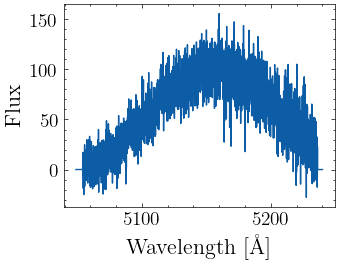

In [33]:
_ = plt.figure()
plt.xlabel('Wavelength [\AA]', size = 16)
plt.ylabel('Flux', size = 16)
plt.tick_params(labelsize = 14, which = 'both')
plt.plot(feros_wavl, feros_flux);

In [34]:
# Example of an APF spectrum
apf_exwavl, apf_exflux = read_spectrum('low_feh_spec/GAIADR3_1028448477581901184.fits', apf = True)

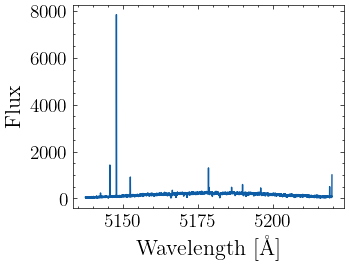

In [35]:
_ = plt.figure()
plt.xlabel('Wavelength [\AA]', size = 16)
plt.ylabel('Flux', size = 16)
plt.tick_params(labelsize = 14, which = 'both')
plt.plot(apf_exwavl, apf_exflux);